# Organización, limpieza y definición de los sets de datos

## Carga y forma de datos

In [44]:
import pandas as pd

# Read the data from the file into a dataframe
df = pd.read_csv('data.txt')

### Tamaño de los datos y método "head"

In [45]:
# Display the dataframe
print(df.shape)
df.head()

(1197, 15)


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


Se tienen datos con 15 columnas y un total de 1197 sets da datos

In [46]:
column_types = df.dtypes
print(column_types)


date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object


Se observa una consistencia en los datos y sus unidades

## Limpieza y descripción de datos

En el siguiente código limpiamos datos de 'department' para definir correctamente los 2 departamentos y eliminamos las fechas, pues no serán de interés en la investigación.

In [47]:
df=df.drop('date',axis=1)
df['department'] = df['department'].str.replace(' ', '')

In [49]:
data_dict={}
for column, values in data_dict.items():
    print(f"{column}:")
    print(f"   Mínimo: {values[0]}")
    print(f"   Promedio: {values[1]}")
    print(f"   Máximo: {values[2]}")


data_dict = {}

data_dict['targeted_productivity'] = [df['targeted_productivity'].describe()['min'], df['targeted_productivity'].describe()['mean'], df['targeted_productivity'].describe()['max']]
data_dict['smv'] = [df['smv'].describe()['min'], df['smv'].describe()['mean'], df['smv'].describe()['max']]
data_dict['wip'] = [df['wip'].describe()['min'], df['wip'].describe()['mean'], df['wip'].describe()['max']]
data_dict['over_time'] = [df['over_time'].describe()['min'], df['over_time'].describe()['mean'], df['over_time'].describe()['max']]
data_dict['incentive'] = [df['incentive'].describe()['min'], df['incentive'].describe()['mean'], df['incentive'].describe()['max']]
data_dict['idle_time'] = [df['idle_time'].describe()['min'], df['idle_time'].describe()['mean'], df['idle_time'].describe()['max']]
data_dict['idle_men'] = [df['idle_men'].describe()['min'], df['idle_men'].describe()['mean'], df['idle_men'].describe()['max']]
data_dict['no_of_style_change'] = [df['no_of_style_change'].describe()['min'], df['no_of_style_change'].describe()['mean'], df['no_of_style_change'].describe()['max']]
data_dict['no_of_workers'] = [df['no_of_workers'].describe()['min'], df['no_of_workers'].describe()['mean'], df['no_of_workers'].describe()['max']]
data_dict['actual_productivity'] = [df['actual_productivity'].describe()['min'], df['actual_productivity'].describe()['mean'], df['actual_productivity'].describe()['max']]

| Variable            | Mínimo | Promedio          | Máximo  |
|---------------------|--------|-------------------|---------|
| targeted_productivity | 0.07   | 0.7296324143692565 | 0.8     |
| smv                 | 2.9    | 15.062172096908938 | 54.56   |
| wip                 | 7.0    | 1190.4659913169319| 23122.0 |
| over_time           | 0.0    | 4567.460317460317 | 25920.0 |
| incentive           | 0.0    | 38.21052631578947 | 3600.0  |
| idle_time           | 0.0    | 0.7301587301587301| 300.0   |
| idle_men            | 0.0    | 0.3692564745196324| 45.0    |
| no_of_style_change  | 0.0    | 0.15037593984962405| 2.0     |
| no_of_workers       | 2.0    | 34.60985797827903 | 89.0    |
| actual_productivity | 0.233705476 | 0.7350910969791145 | 1.1204375 |


Datos únicos de las variables tipo Object

In [50]:
unique_data_dict={}
unique_data_dict['team'] = sorted(df['team'].unique().tolist())

for column in df.columns:
    if df[column].dtype == 'object':
        unique_data_dict[column] = df[column].unique().tolist()
unique_data_dict


{'team': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 'quarter': ['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
 'department': ['sweing', 'finishing'],
 'day': ['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday']}

### Datos separados por departamento

Eliminamos los datos de las fechas para obtener un nuevo dataframe sin esta columna

Separamos los datos en dos DataFrames diferentes para poder trabajar sobre ellos correctamente. Se separarán de acuerdo a los dos departamentos que hay 'sweing' y 'finishing'. Lo anterior, para objetivos del estudio. También, se eliminarán 

In [51]:
df_sweing = df[df['department'] == 'sweing']
df_finishing = df[df['department'] == 'finishing']
df_finishing = df_finishing.drop(['wip','idle_men','idle_time','no_of_style_change','department','incentive'], axis=1)
df_sweing = df_sweing .drop(['department','idle_men','idle_time','no_of_style_change'], axis=1)
print(df_sweing.shape)
print(df_finishing.shape)
df_finishing

(691, 10)
(506, 8)


,quarter,day,team,targeted_productivity,smv,over_time,no_of_workers,actual_productivity
1,Quarter1,Thursday,1,0.75,3.94,960,8.0,0.886500
6,Quarter1,Thursday,2,0.75,3.94,960,8.0,0.755167
13,Quarter1,Thursday,10,0.65,3.94,960,8.0,0.705917
14,Quarter1,Thursday,8,0.75,2.90,960,8.0,0.676667
15,Quarter1,Thursday,4,0.75,3.94,2160,18.0,0.593056
16,Quarter1,Thursday,7,0.80,2.90,960,8.0,0.540729
18,Quarter1,Thursday,11,0.70,4.15,1440,12.0,0.436326
19,Quarter1,Saturday,4,0.80,4.15,6600,20.0,0.988025
20,Quarter1,Saturday,11,0.75,2.90,5640,17.0,0.987880
21,Quarter1,Saturday,9,0.80,4.15,960,8.0,0.956271


Se analizaran cada uno de estos Dataframes separados.

#### DataFrame Sweing

In [52]:
data_dict = {}

data_dict['targeted_productivity'] = [df_sweing['targeted_productivity'].describe()['min'], df_sweing['targeted_productivity'].describe()['mean'], df_sweing['targeted_productivity'].describe()['max']]
data_dict['smv'] = [df_sweing['smv'].describe()['min'], df_sweing['smv'].describe()['mean'], df_sweing['smv'].describe()['max']]
data_dict['wip'] = [df_sweing['wip'].describe()['min'], df_sweing['wip'].describe()['mean'], df_sweing['wip'].describe()['max']]
data_dict['over_time'] = [df_sweing['over_time'].describe()['min'], df_sweing['over_time'].describe()['mean'], df_sweing['over_time'].describe()['max']]
data_dict['incentive'] = [df_sweing['incentive'].describe()['min'], df_sweing['incentive'].describe()['mean'], df_sweing['incentive'].describe()['max']]
data_dict['no_of_workers'] = [df_sweing['no_of_workers'].describe()['min'], df_sweing['no_of_workers'].describe()['mean'], df_sweing['no_of_workers'].describe()['max']]
data_dict['actual_productivity'] = [df_sweing['actual_productivity'].describe()['min'], df_sweing['actual_productivity'].describe()['mean'], df_sweing['actual_productivity'].describe()['max']]


for column, values in data_dict.items():
    print(f"{column}:")
    print(f"   Mínimo: {values[0]}")
    print(f"   Promedio: {values[1]}")
    print(f"   Máximo: {values[2]}")

targeted_productivity:
   Mínimo: 0.07
   Promedio: 0.7239797395079595
   Máximo: 0.8
smv:
   Mínimo: 10.05
   Promedio: 23.245412445730825
   Máximo: 54.56
wip:
   Mínimo: 7.0
   Promedio: 1190.4659913169319
   Máximo: 23122.0
over_time:
   Mínimo: 0.0
   Promedio: 6508.205499276411
   Máximo: 25920.0
incentive:
   Mínimo: 0.0
   Promedio: 44.483357452966715
   Máximo: 138.0
no_of_workers:
   Mínimo: 26.0
   Promedio: 52.44573082489146
   Máximo: 89.0
actual_productivity:
   Mínimo: 0.233705476
   Promedio: 0.7220130317105644
   Máximo: 1.100483918


| Variable            | Mínimo | Promedio          | Máximo  |
|---------------------|--------|-------------------|---------|
| targeted_productivity | 0.07   | 0.7239797395079595 | 0.8     |
| smv                 | 10.05  | 23.245412445730825 | 54.56   |
| wip                 | 7.0    | 1190.4659913169319| 23122.0 |
| over_time           | 0.0    | 6508.205499276411 | 25920.0 |
| incentive           | 0.0    | 44.483357452966715 | 138.0   |
| idle_time           | 0.0    | 1.264833574529667 | 300.0   |
| idle_men            | 0.0    | 0.6396526772793053| 45.0    |
| no_of_style_change  | 0.0    | 0.26049204052098407| 2.0     |
| no_of_workers       | 26.0   | 52.44573082489146 | 89.0    |
| actual_productivity | 0.233705476 | 0.7220130317105644 | 1.100483918 |


In [53]:
unique_data_dict['team'] = sorted(df_sweing['team'].unique().tolist())

for column in df_sweing.columns:
    if df_sweing[column].dtype == 'object':
        unique_data_dict[column] = df_sweing[column].unique().tolist()
unique_data_dict
#final

{'team': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 'quarter': ['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
 'department': ['sweing', 'finishing'],
 'day': ['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday']}

#### Data Finishing

In [54]:

data_dict = {}
data_dict['targeted_productivity'] = [df_finishing['targeted_productivity'].describe()['min'], df_finishing['targeted_productivity'].describe()['mean'], df_finishing['targeted_productivity'].describe()['max']]
data_dict['smv'] = [df_finishing['smv'].describe()['min'], df_finishing['smv'].describe()['mean'], df_finishing['smv'].describe()['max']]
data_dict['over_time'] = [df_finishing['over_time'].describe()['min'], df_finishing['over_time'].describe()['mean'], df_finishing['over_time'].describe()['max']]
data_dict['no_of_workers'] = [df_finishing['no_of_workers'].describe()['min'], df_finishing['no_of_workers'].describe()['mean'], df_finishing['no_of_workers'].describe()['max']]
data_dict['actual_productivity'] = [df_finishing['actual_productivity'].describe()['min'], df_finishing['actual_productivity'].describe()['mean'], df_finishing['actual_productivity'].describe()['max']]

for column, values in data_dict.items():
    print(f"{column}:")
    print(f"   Mínimo: {values[0]}")
    print(f"   Promedio: {values[1]}")
    print(f"   Máximo: {values[2]}")

targeted_productivity:
   Mínimo: 0.35
   Promedio: 0.7373517786561267
   Máximo: 0.8
smv:
   Mínimo: 2.9
   Promedio: 3.887035573122529
   Máximo: 5.13
over_time:
   Mínimo: 0.0
   Promedio: 1917.1541501976285
   Máximo: 15000.0
no_of_workers:
   Mínimo: 2.0
   Promedio: 10.25296442687747
   Máximo: 28.0
actual_productivity:
   Mínimo: 0.235795455
   Promedio: 0.7529506683241106
   Máximo: 1.1204375


| Variable            | Mínimo | Promedio          | Máximo  |
|---------------------|--------|-------------------|---------|
| targeted_productivity | 0.35   | 0.7373517786561267 | 0.8     |
| smv                 | 2.9    | 3.887035573122529  | 5.13    |
| over_time           | 0.0    | 1917.1541501976285 | 15000.0 |
| incentive           | 0.0    | 29.64426877470356  | 3600.0  |
| no_of_workers       | 2.0    | 10.25296442687747  | 28.0    |
| actual_productivity | 0.235795455 | 0.7529506683241106 | 1.1204375 |


In [55]:
unique_data_dict['team'] = sorted(df_finishing['team'].unique().tolist())

for column in df_finishing.columns:
    if df_finishing[column].dtype == 'object':
        unique_data_dict[column] = df_finishing[column].unique().tolist()
unique_data_dict

{'team': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 'quarter': ['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
 'department': ['sweing', 'finishing'],
 'day': ['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday']}

In [56]:
# Eliminar las filas con datos faltantes en df_sweing
df_sweing = df_sweing.dropna()

# Eliminar las filas con datos faltantes en df_finishing
df_finishing = df_finishing.dropna()

## Limpieza de datos

### Graficos de dispersión para observar relaciones bivariadas entre pares de variables

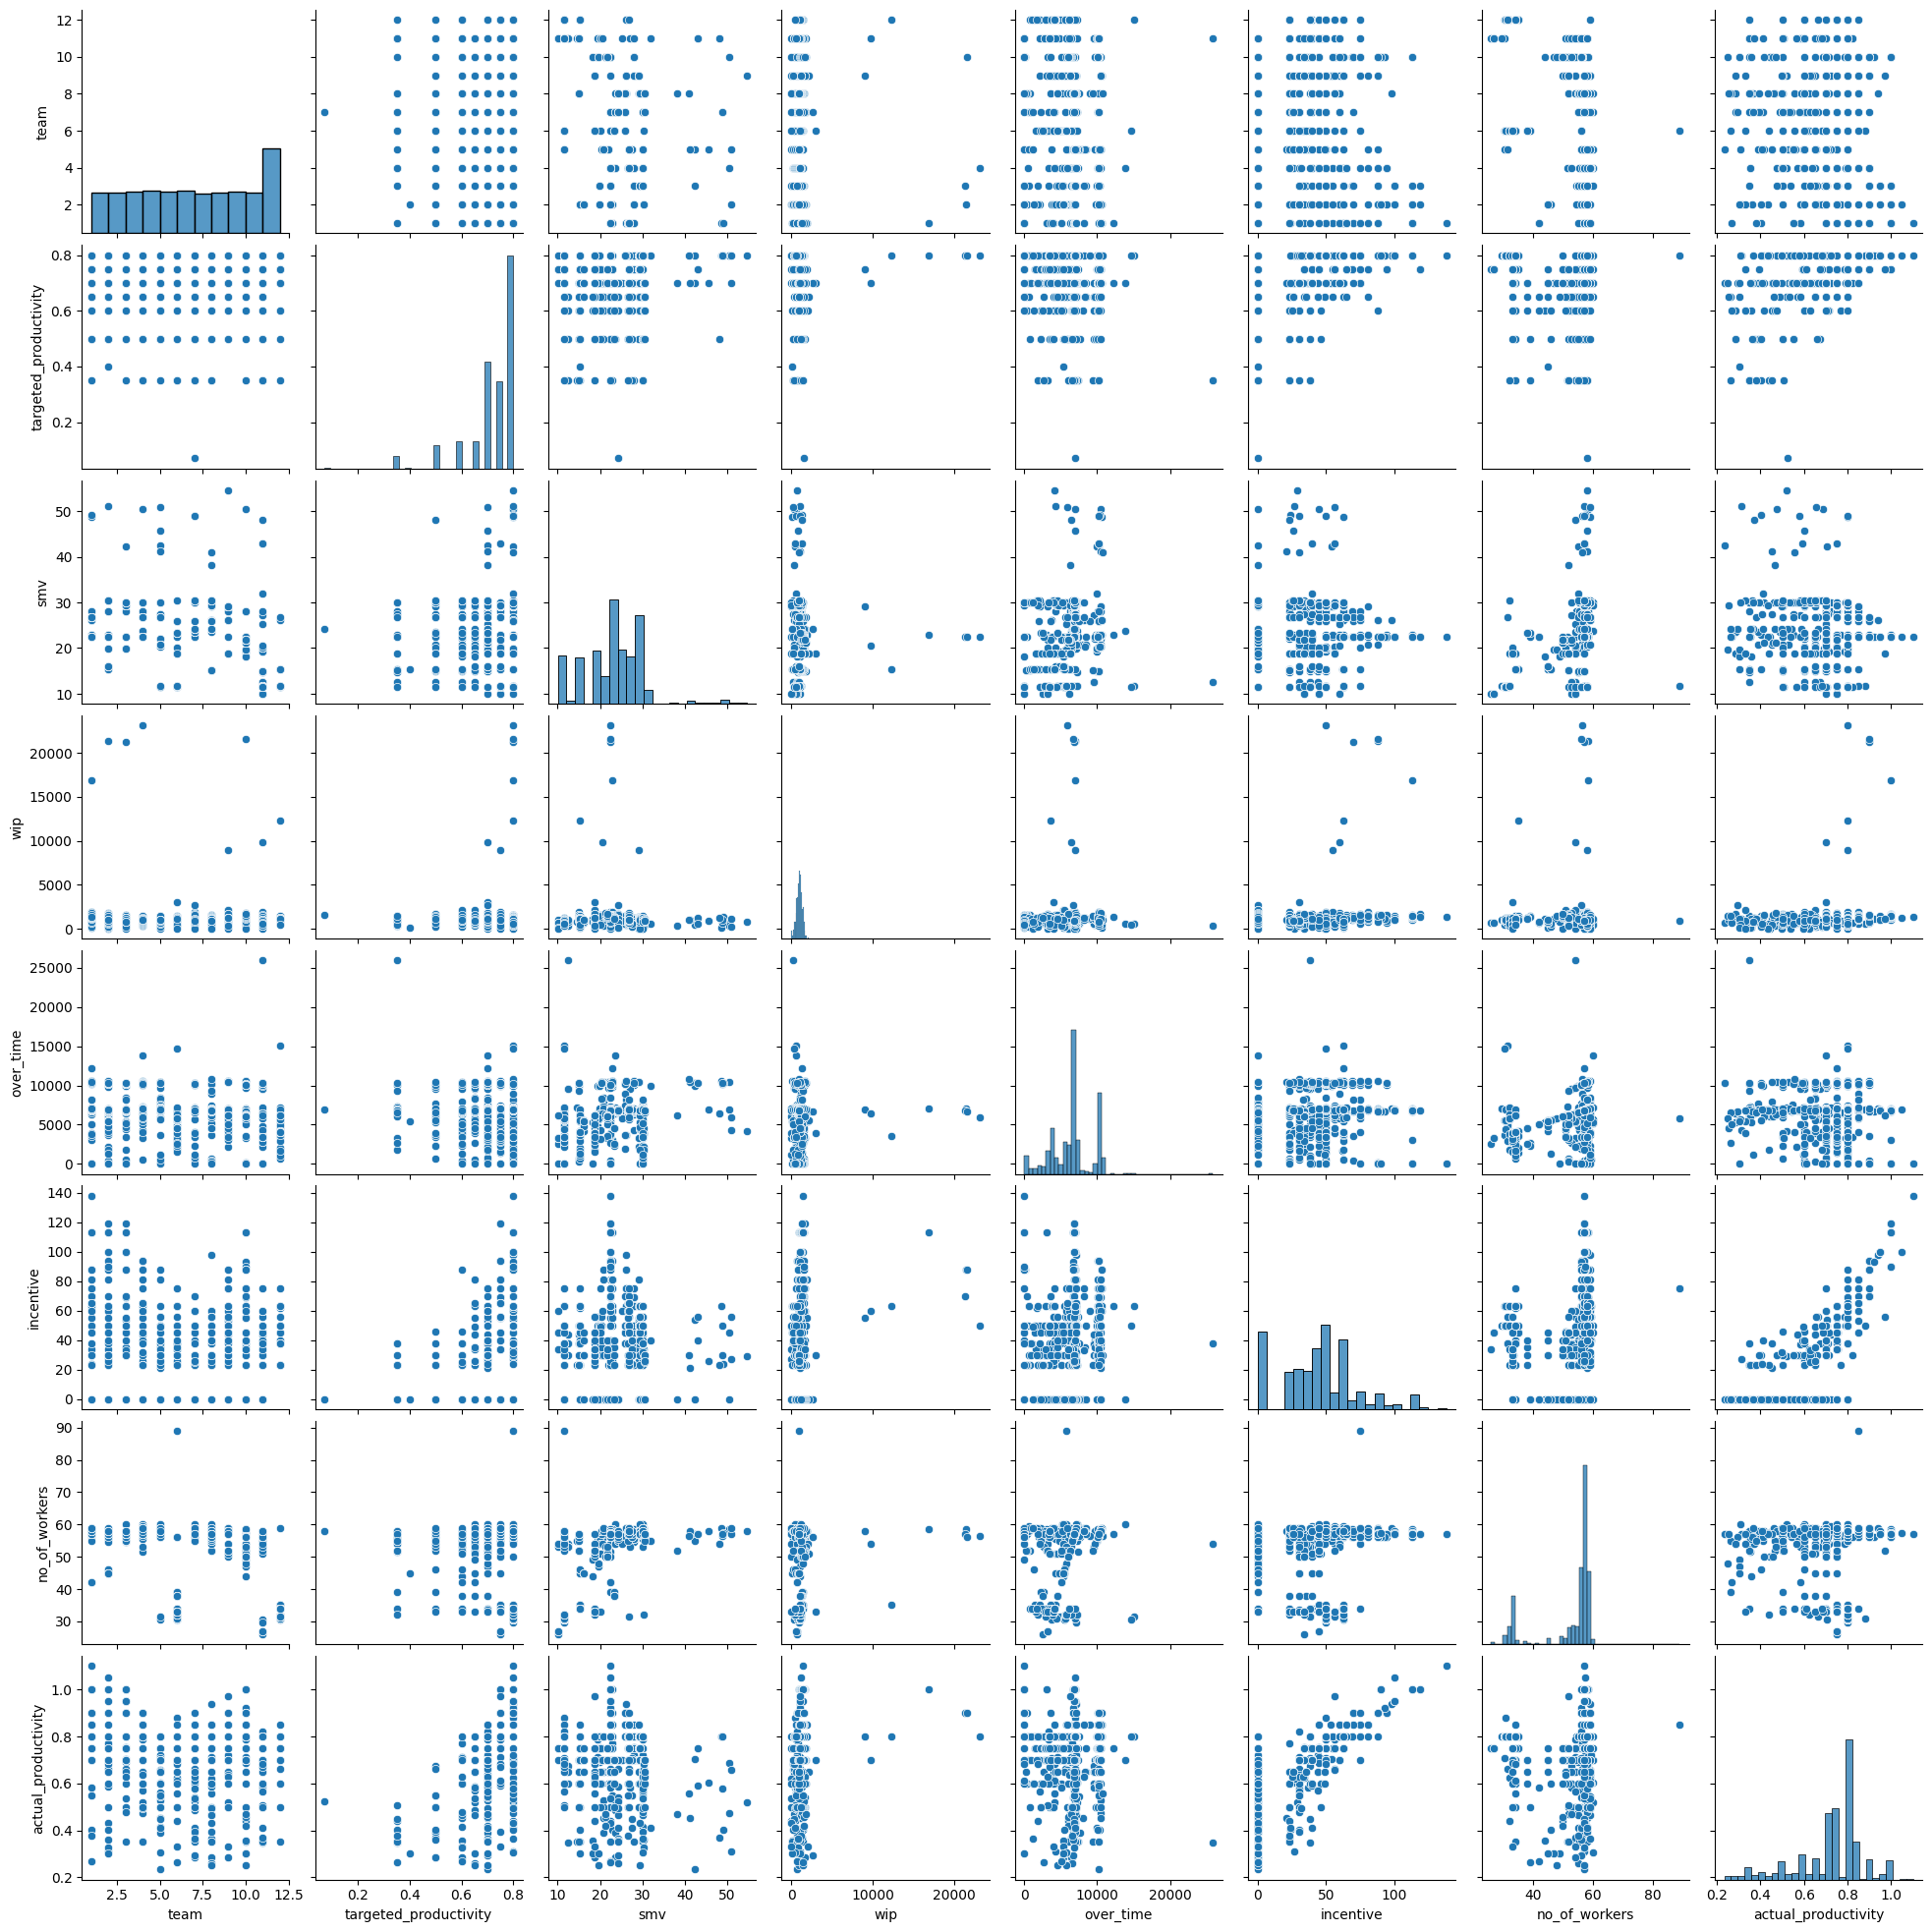

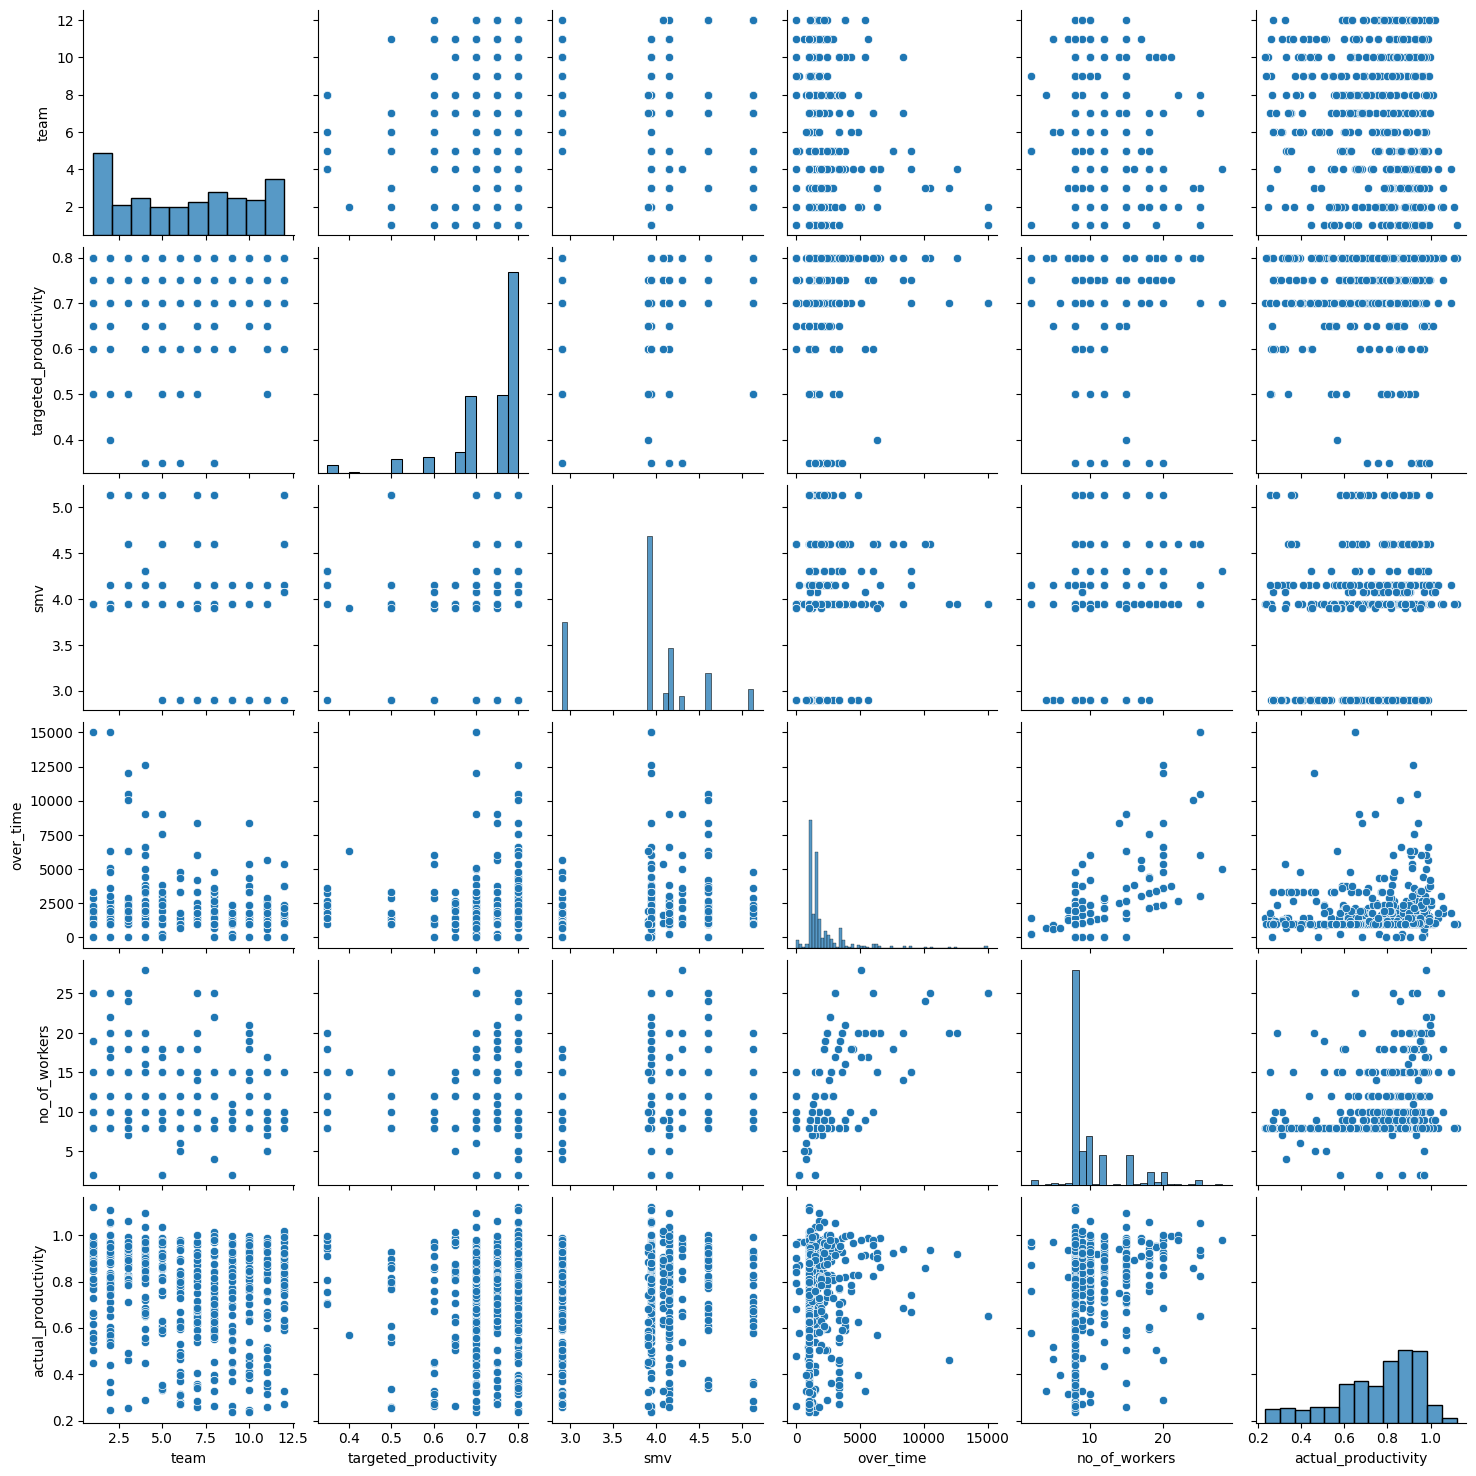

In [57]:
import seaborn as sns
sns.pairplot(df_sweing,)
sns.pairplot(df_finishing,)

### Diagramas de cajas y bigotes para cada set

#### Diagramas dataframe Sweing

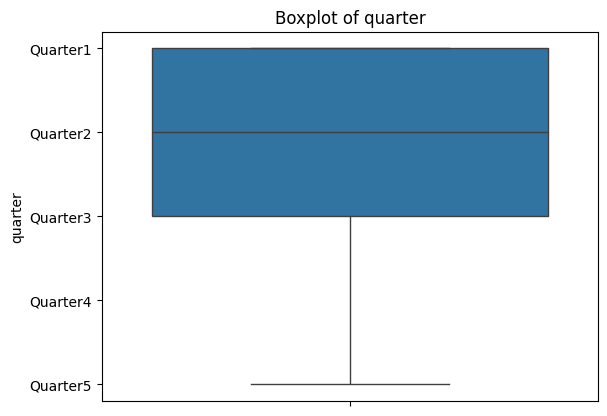

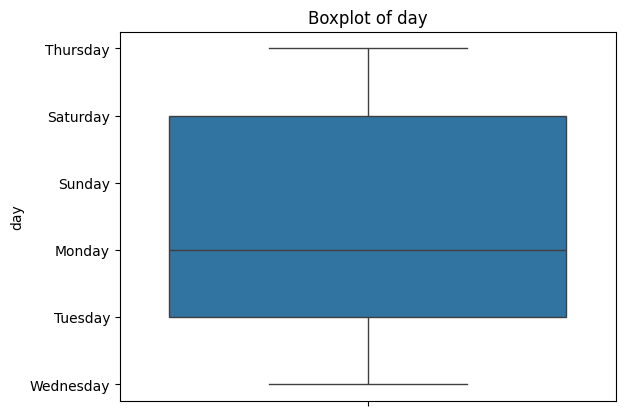

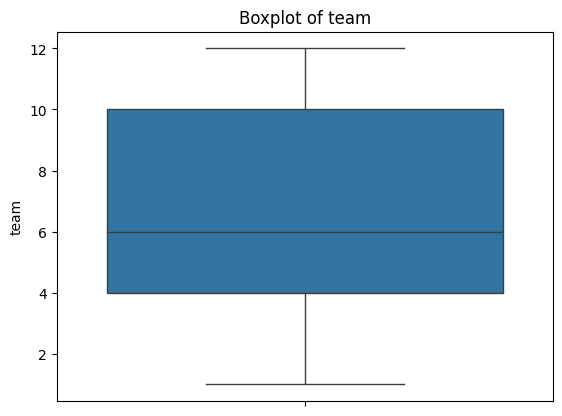

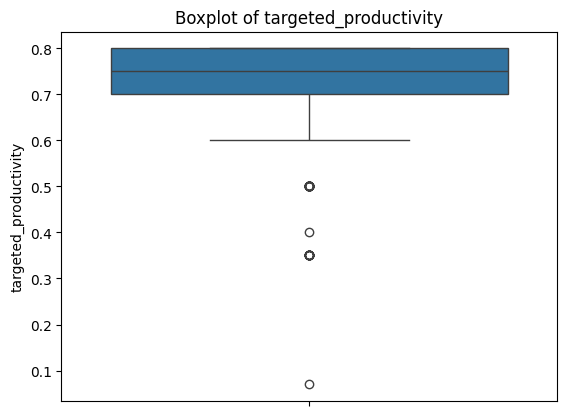

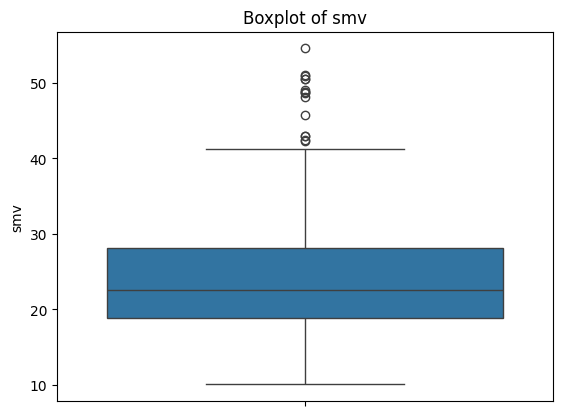

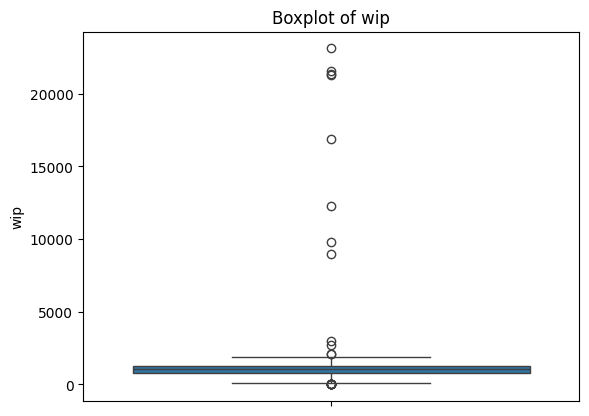

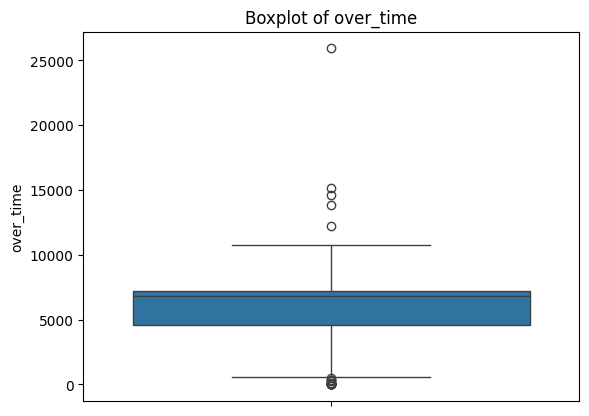

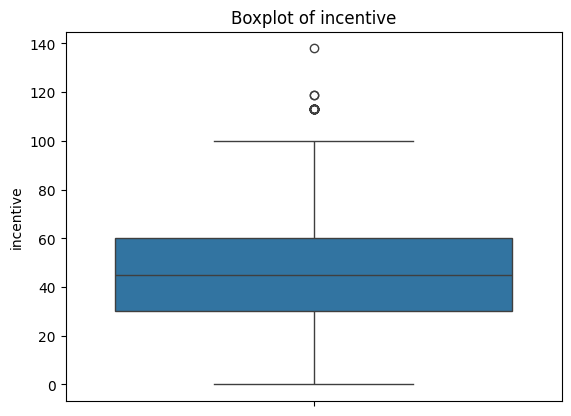

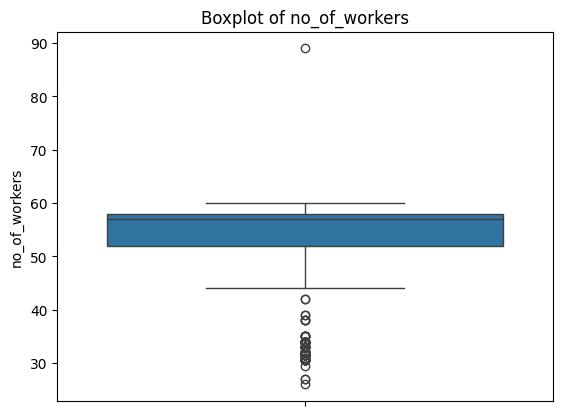

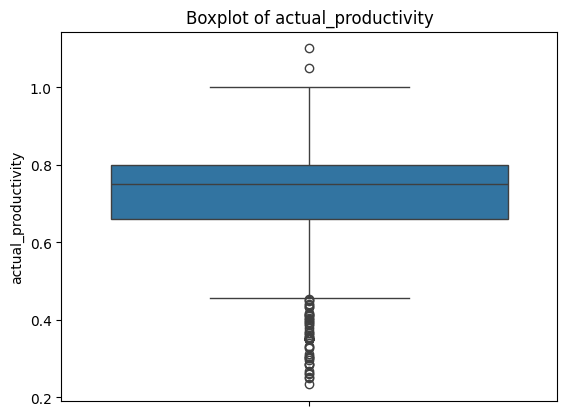

In [58]:
import matplotlib.pyplot as plt

# Obtener la lista de variables
variables = df_sweing.columns.tolist()

# Generar los boxplots de forma independiente
for variable in variables:
    plt.figure()
    sns.boxplot(data=df_sweing[variable])
    plt.title(f"Boxplot of {variable}")
    plt.show()



In [59]:
#tamaño de la base de datos
print(df_sweing.shape)

(691, 10)


#### Eliminación de datos atipicos de Sweing

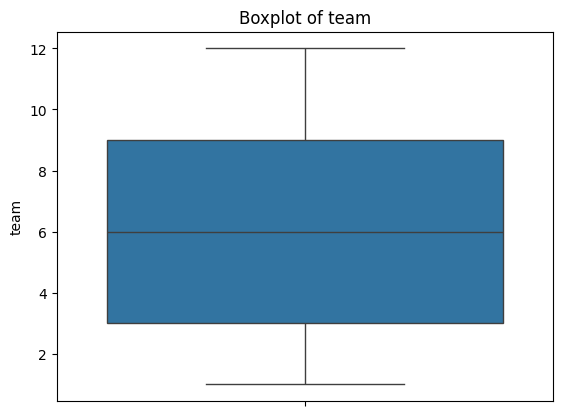

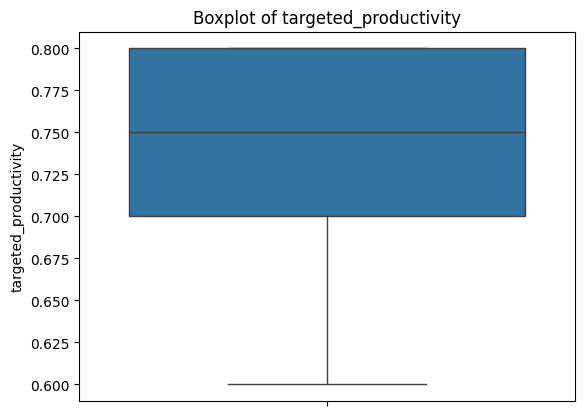

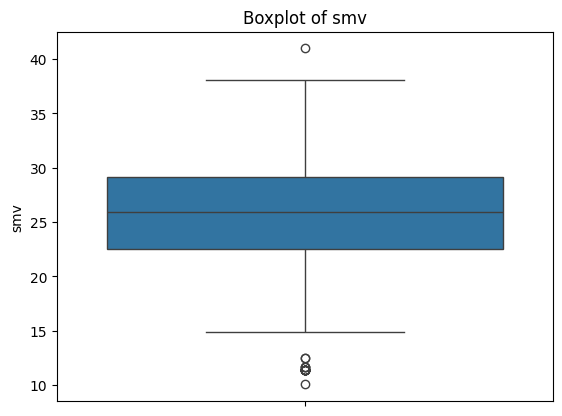

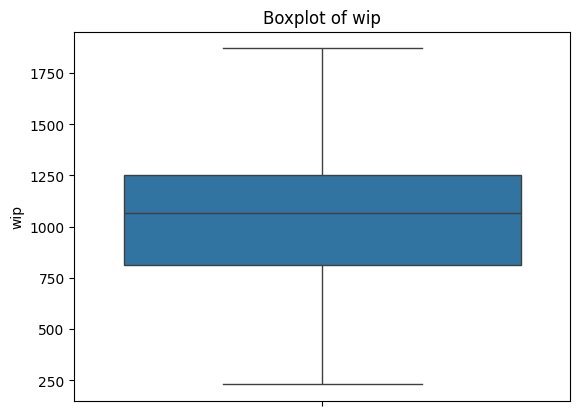

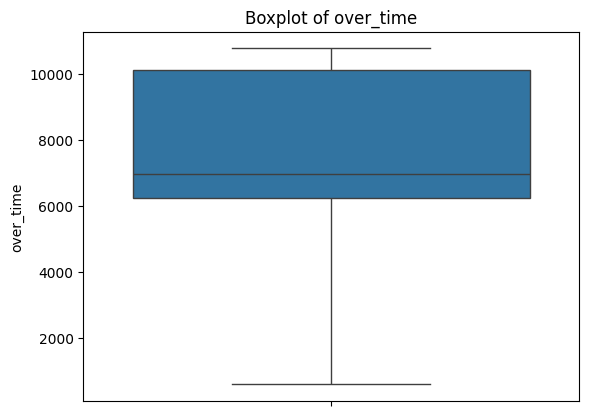

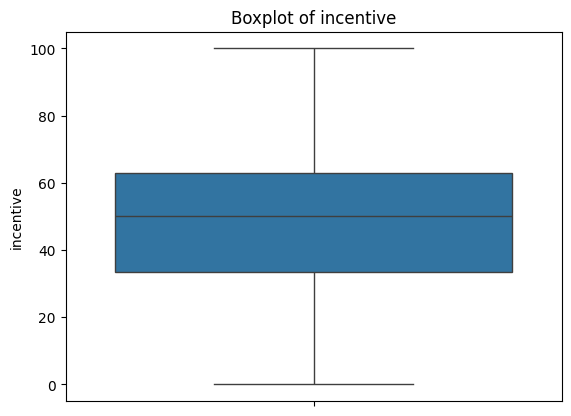

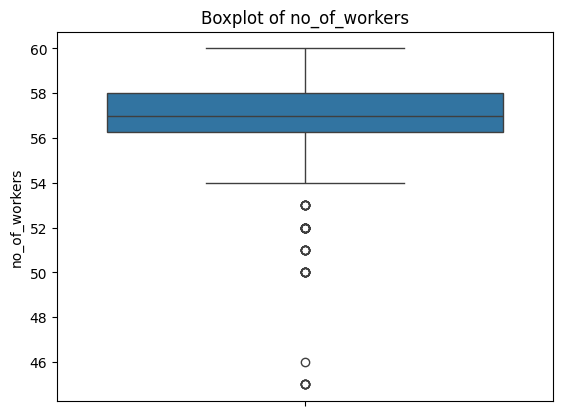

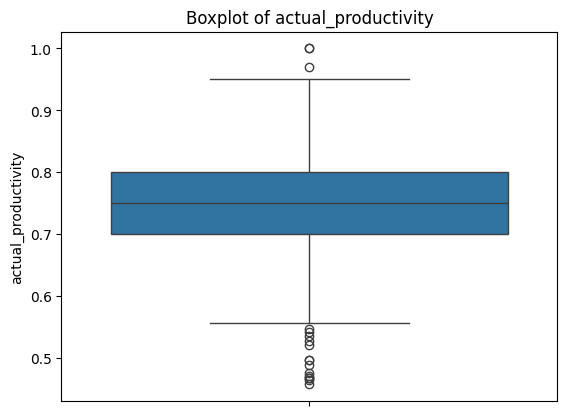

In [60]:
import numpy as np

# Seleccionar solo las columnas numéricas
df_sweing_numeric = df_sweing.select_dtypes(include=[np.number])

# Calcular el rango intercuartílico
Q1 = df_sweing_numeric.quantile(0.25)
Q3 = df_sweing_numeric.quantile(0.75)
IQR = Q3 - Q1

# Crear una máscara para los datos atípicos
mask = ~((df_sweing_numeric < (Q1 - 1.5 * IQR)) | (df_sweing_numeric > (Q3 + 1.5 * IQR))).any(axis=1)

# Aplicar la máscara al DataFrame original para eliminar las filas con datos atípicos
df_sweing = df_sweing[mask]

# Generar los boxplots de forma independiente
for variable in df_sweing_numeric.columns:
    plt.figure()
    sns.boxplot(data=df_sweing[variable])
    plt.title(f"Boxplot of {variable}")
    plt.show()


In [61]:
#tamaño de la base de datos
print(df_sweing.shape)

(419, 10)


#### Diagramas dataframe Finishing

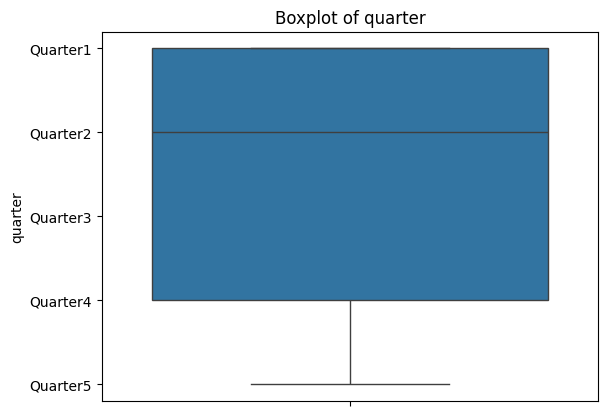

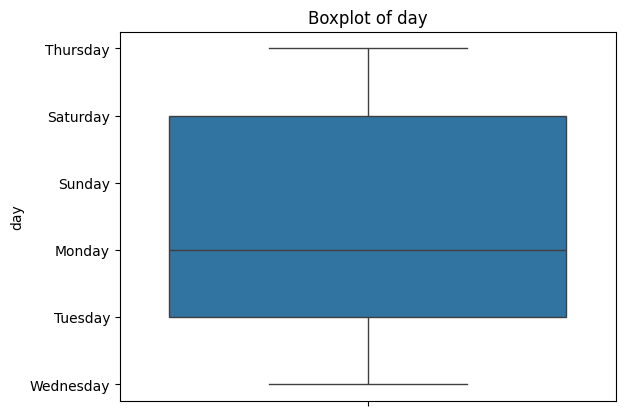

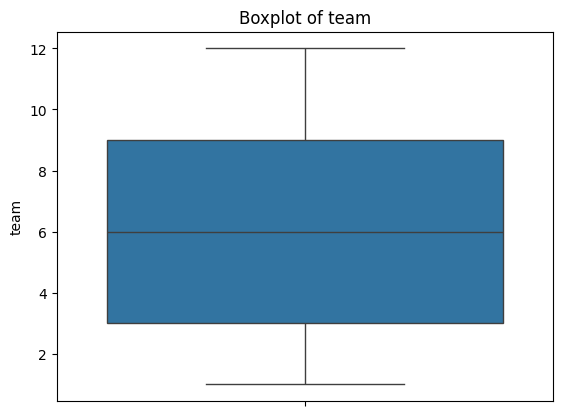

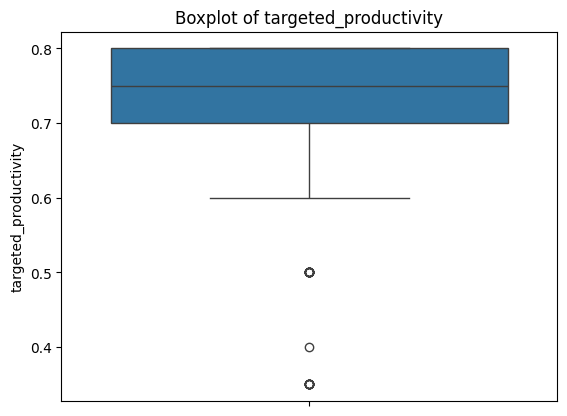

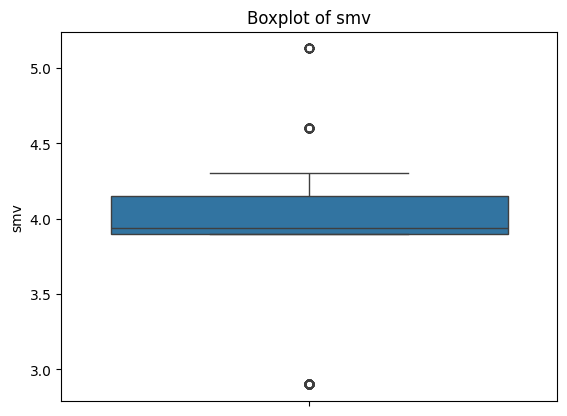

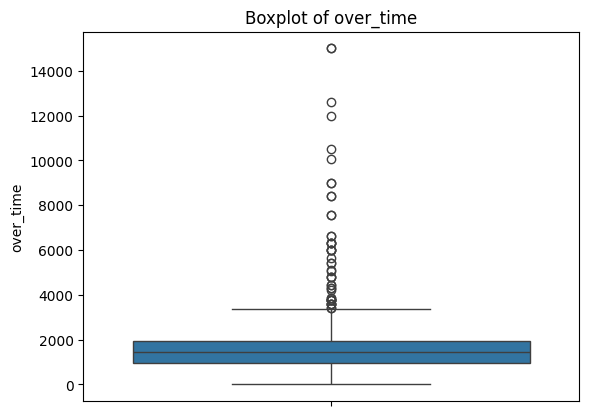

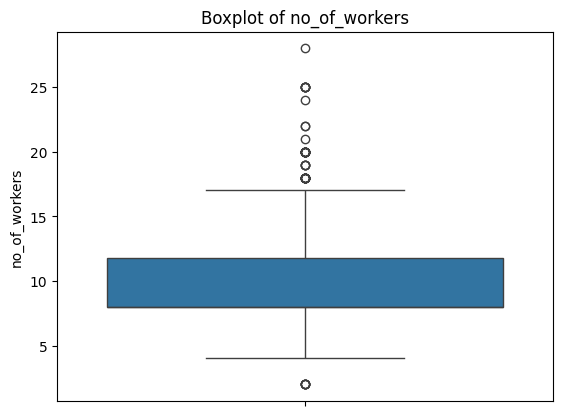

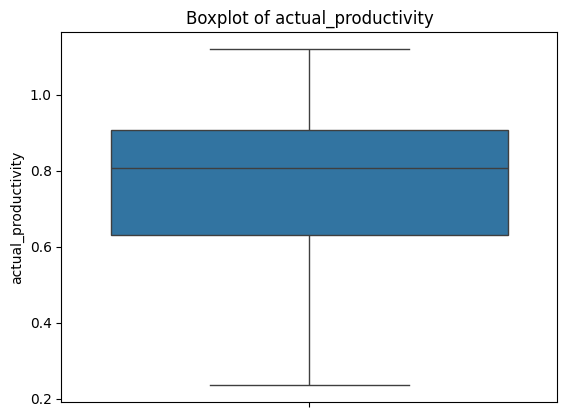

In [62]:
import matplotlib.pyplot as plt

# Obtener la lista de variables
variables = df_finishing.columns.tolist()

# Generar los boxplots de forma independiente
for variable in variables:
    plt.figure()
    sns.boxplot(data=df_finishing[variable])
    plt.title(f"Boxplot of {variable}")
    plt.show()

#### Eliminación de datos atipicos de Finishing

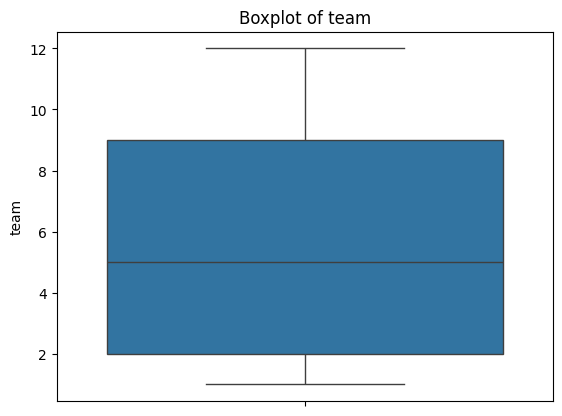

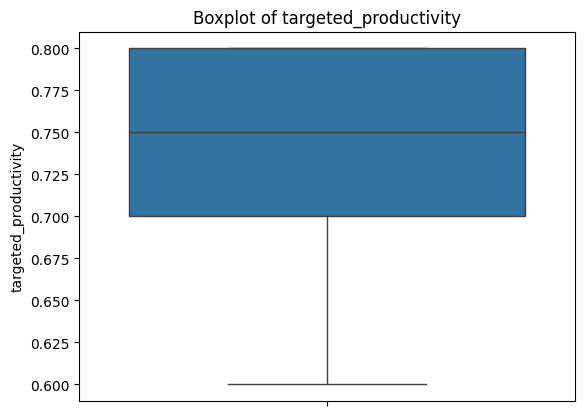

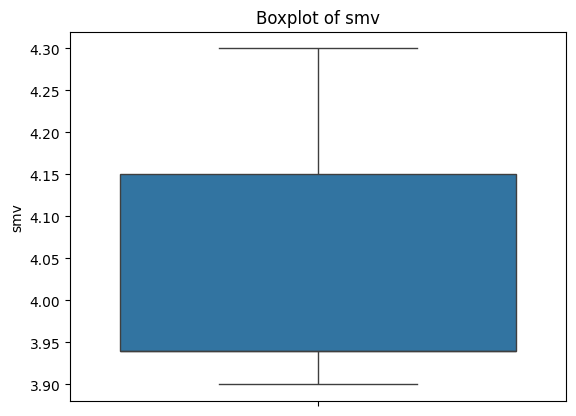

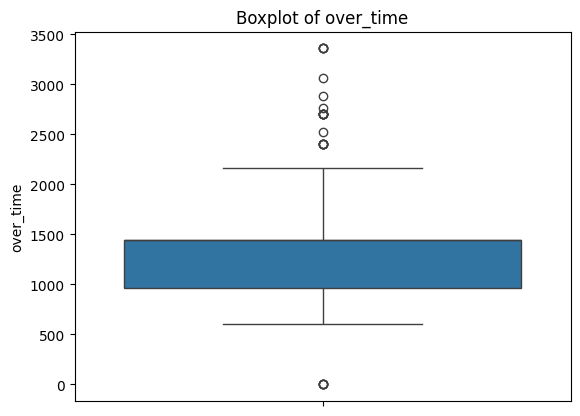

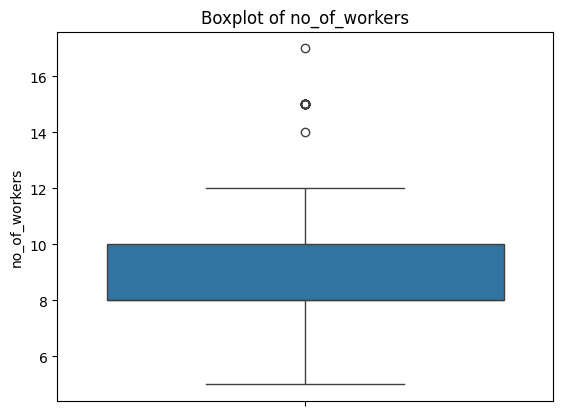

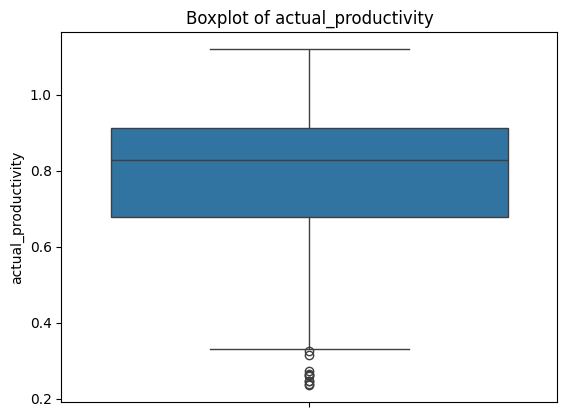

In [63]:
import numpy as np

# Seleccionar solo las columnas numéricas
df_finishing_numeric = df_finishing.select_dtypes(include=[np.number])

# Calcular el rango intercuartílico
Q1 = df_finishing_numeric.quantile(0.25)
Q3 = df_finishing_numeric.quantile(0.75)
IQR = Q3 - Q1

# Crear una máscara para los datos atípicos
mask = ~((df_finishing_numeric < (Q1 - 1.5 * IQR)) | (df_finishing_numeric > (Q3 + 1.5 * IQR))).any(axis=1)

# Aplicar la máscara al DataFrame original para eliminar las filas con datos atípicos
df_finishing = df_finishing[mask]

# Generar los boxplots de forma independiente
for variable in df_finishing_numeric.columns:
    plt.figure()
    sns.boxplot(data=df_finishing[variable])
    plt.title(f"Boxplot of {variable}")
    plt.show()

In [64]:
#tamaño de la base de datos
print(df_finishing.shape)

(258, 8)


## Modelación del modelo de regresión 

### Modelo departamento Sweing

#### Formulación del modelo con todas las variables

In [65]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Dividir los datos en variables dependientes e independientes
X = df_sweing.drop('actual_productivity', axis=1)
# Codificar las variables categóricas
X = pd.get_dummies(X, drop_first=True)
X = pd.get_dummies(X, drop_first=True).astype(int)
#Variable
y = df_sweing['actual_productivity']
# Convertir todas las columnas a un tipo de datos numérico
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Añade una columna constante al DataFrame X
X = sm.add_constant(X)
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Crear el modelo de regresión lineal
model = sm.OLS(y_train, X_train)
# Entrenar el modelo
results = model.fit()
# Realizar predicciones
y_pred = results.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación
r2 = r2_score(y_test, y_pred)

# Mostrar los resultados
print(f"Error cuadrático medio: {mse}")
print(f"Coeficiente de determinación: {r2}")

# Mostrar el resumen del modelo
print(results.summary())

# coeficientes con nombre de las características
coefs = pd.DataFrame(results.params, index=X.columns, columns=['Coeficiente'])
print(coefs)



Error cuadrático medio: 0.0033188806734448604
Coeficiente de determinación: 0.6726054775295927
                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.656
Model:                             OLS   Adj. R-squared:                  0.640
Method:                  Least Squares   F-statistic:                     40.64
Date:                 Tue, 12 Mar 2024   Prob (F-statistic):           8.32e-65
Time:                         16:00:01   Log-Likelihood:                 496.97
No. Observations:                  335   AIC:                            -961.9
Df Residuals:                      319   BIC:                            -900.9
Df Model:                           15                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------

##### Se observa que el modelo es globalmente significativo 

In [66]:
# Nivel de significancia
alpha = 0.05
# Obtener el valor p del estadístico F del modelo
f_pvalue = results.f_pvalue

# Concluir sobre la significancia global del modelo
if f_pvalue < alpha:
    print("El valor p del estadístico F es menor que el nivel de significancia. Por lo tanto, rechazamos la hipótesis nula y concluimos que el modelo es globalmente significativo.")
else:
    print("El valor p del estadístico F es mayor que el nivel de significancia. Por lo tanto, no rechazamos la hipótesis nula y concluimos que no hay evidencia suficiente para afirmar que el modelo es globalmente significativo.")

# Obtener los valores p de las variables
p_values = results.pvalues

# Identificar las variables no significativas
non_significant_vars = p_values[p_values > alpha].index

# Imprimir las variables no significativas
print("Las siguientes variables no son significativas en el modelo:")
print(non_significant_vars)

El valor p del estadístico F es menor que el nivel de significancia. Por lo tanto, rechazamos la hipótesis nula y concluimos que el modelo es globalmente significativo.
Las siguientes variables no son significativas en el modelo:
Index(['team', 'smv', 'wip', 'no_of_workers', 'quarter_Quarter2',
       'quarter_Quarter3', 'quarter_Quarter4', 'quarter_Quarter5',
       'day_Saturday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday'],
      dtype='object')


#### Revisión de multicolinealidad con VIF

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcular el VIF para cada variable, excluyendo la primera variable
vif = pd.DataFrame()
vif["Variable"] = X_train.columns[1:]  # Excluir la primera variable
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(1, X_train.shape[1])]  # Excluir la primera variable

# Mostrar el VIF
print(vif)

# Verificar si hay algún VIF mayor que 10
if any(vif["VIF"] > 10):
    print("Hay al menos una variable con un VIF mayor que 10, lo que indica problemas de multicolinealidad.")
else:
    print("No hay variables con un VIF mayor que 10, por lo que no parece haber problemas de multicolinealidad.")

                 Variable       VIF
0                    team  1.187764
1   targeted_productivity       NaN
2                     smv  1.486065
3                     wip  1.222993
4               over_time  1.197001
5               incentive  1.222553
6           no_of_workers  1.514030
7        quarter_Quarter2  1.361214
8        quarter_Quarter3  1.363293
9        quarter_Quarter4  1.367317
10       quarter_Quarter5  1.232414
11           day_Saturday  1.626028
12             day_Sunday  1.731756
13           day_Thursday  1.753134
14            day_Tuesday  1.671071
15          day_Wednesday  1.671768
No hay variables con un VIF mayor que 10, por lo que no parece haber problemas de multicolinealidad.


c:\Users\57313\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


##### Como no hay ningun VIF de mas de 10, se dice que no hay problemas de multicolinealidad

#### Revisión de heterocedasticidad mediante la prueba Breusch Pagan

In [68]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Calcular los residuos del modelo
residuos = results.resid

# Realizar la prueba de Breusch-Pagan
bp_test = het_breuschpagan(residuos, results.model.exog)

# Imprimir los resultados
labels = ['Estadístico de la prueba', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

# Nivel de significancia
alpha = 0.05

# Concluir sobre la presencia de heterocedasticidad
if bp_test[1] < alpha:
    print("El valor p es menor que el nivel de significancia. Por lo tanto, rechazamos la hipótesis nula y concluimos que hay heterocedasticidad en el modelo.")
else:
    print("El valor p es mayor que el nivel de significancia. Por lo tanto, no rechazamos la hipótesis nula y concluimos que no hay evidencia suficiente para afirmar que hay heterocedasticidad en el modelo.")


{'Estadístico de la prueba': 66.85561679996852, 'p-value': 3.5227768204449145e-08, 'f-value': 5.302352785882122, 'f p-value': 1.6464953775867071e-09}
El valor p es menor que el nivel de significancia. Por lo tanto, rechazamos la hipótesis nula y concluimos que hay heterocedasticidad en el modelo.


##### Como se puede observar, el p-value es menor que 0.05, por lo que se rechaza la hipótesis nula y se concluye que el modelo presenta heterocedasticidad.

#### Revisión de la autocorrelación de los residuos con la prueba de Durbin-Watson

In [69]:
from statsmodels.stats.stattools import durbin_watson

# Calcular los residuos del modelo
residuos = results.resid

# Realizar la prueba de Durbin-Watson
dw_test = durbin_watson(residuos)

# Imprimir el resultado
print(f"Estadístico de Durbin-Watson: {dw_test}")

# Interpretar el resultado
if dw_test < 1.5:
    print("Hay evidencia de autocorrelación positiva.")
elif dw_test > 2.5:
    print("Hay evidencia de autocorrelación negativa.")
else:
    print("No hay evidencia de autocorrelación.")


Estadístico de Durbin-Watson: 2.0043064944282882
No hay evidencia de autocorrelación.


In [70]:
print(df_sweing.dtypes)

quarter                   object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
no_of_workers            float64
actual_productivity      float64
dtype: object


In [ ]:
import pandas as pd
pd.set_option('display.max_rows', None)
print(df_sweing)

#### Revisión de la especificación con la prueba Ramsey- Reset

In [71]:
from statsmodels.stats.outliers_influence import reset_ramsey

#Realizar la prueba de Ramsey RESET
reset_test = reset_ramsey(results, degree=5)

# Imprimir los resultados
labels = ['Estadístico de la prueba', 'p-value']
print(dict(zip(labels, reset_test)))

c:\Users\57313\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:143: RuntimeWarning: invalid value encountered in divide
  exog /= np.sqrt((exog ** 2).mean(0))


MissingDataError: exog contains inf or nans

#### Definición del modelo

##### Prueba F parcial para descartar variables no significativas

In [ ]:
import statsmodels.api as sm

# Ajustar el modelo completo
model_full = sm.OLS(y_train, X_train)
results_full = model_full.fit()

# Obtener las p-values
p_values = results_full.pvalues

# Crear un DataFrame para el modelo reducido solo con las variables significativas
X_train_reduced = X_train.loc[:, p_values <= 0.05]

# Ajustar el modelo reducido
model_reduced = sm.OLS(y_train, X_train_reduced)
results_reduced = model_reduced.fit()

# Realizar la prueba de razón de verosimilitud
lr, p_value, df_diff = results_full.compare_lr_test(results_reduced)

# Imprimir los resultados
print(f"Estadístico de la prueba: {lr}")
print(f"p-value: {p_value}")
print(f"Diferencia en grados de libertad: {df_diff}")

### Modelo final Sweing


In [ ]:
print(results_reduced.summary())
# Nivel de significancia
alpha = 0.05

# Evaluar la significancia global
f_pvalue = results_reduced.f_pvalue
if f_pvalue < alpha:
    print("El modelo es globalmente significativo.")
else:
    print("El modelo no es globalmente significativo.")

# Evaluar el R^2
r_squared = results_reduced.rsquared
print(f"El R^2 del modelo es {r_squared}.")

# Evaluar la significancia individual
p_values = results_reduced.pvalues
significant_vars = p_values[p_values <= alpha].index
non_significant_vars = p_values[p_values > alpha].index
print(f"Las variables significativas son: {significant_vars}")
print(f"Las variables no significativas son: {non_significant_vars}")



### Modelo departamento Finishing

#### Formulación del modelo con todas las variables

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Dividir los datos en variables dependientes e independientes
X = df_finishing.drop('actual_productivity', axis=1)
# Codificar las variables categóricas
X = pd.get_dummies(X, drop_first=True)
X = pd.get_dummies(X, drop_first=True).astype(int)
#Variable
y = df_finishing['actual_productivity']
# Convertir todas las columnas a un tipo de datos numérico
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Añade una columna constante al DataFrame X
X = sm.add_constant(X)
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Crear el modelo de regresión lineal
model = sm.OLS(y_train, X_train)
# Entrenar el modelo
results = model.fit()
# Realizar predicciones
y_pred = results.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación
r2 = r2_score(y_test, y_pred)

# Mostrar los resultados
print(f"Error cuadrático medio: {mse}")
print(f"Coeficiente de determinación: {r2}")

# Mostrar el resumen del modelo
print(results.summary())

# coeficientes con nombre de las características
coefs = pd.DataFrame(results.params, index=X.columns, columns=['Coeficiente'])
print(coefs)



In [ ]:
# Nivel de significancia
alpha = 0.05
# Obtener el valor p del estadístico F del modelo
f_pvalue = results.f_pvalue

# Concluir sobre la significancia global del modelo
if f_pvalue < alpha:
    print("El valor p del estadístico F es menor que el nivel de significancia. Por lo tanto, rechazamos la hipótesis nula y concluimos que el modelo es globalmente significativo.")
else:
    print("El valor p del estadístico F es mayor que el nivel de significancia. Por lo tanto, no rechazamos la hipótesis nula y concluimos que no hay evidencia suficiente para afirmar que el modelo es globalmente significativo.")

# Obtener los valores p de las variables
p_values = results.pvalues

# Identificar las variables no significativas
non_significant_vars = p_values[p_values > alpha].index

# Imprimir las variables no significativas
print("Las siguientes variables no son significativas en el modelo:")
print(non_significant_vars)

#### Revisión de multicolinealidad con VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcular el VIF para cada variable, excluyendo la primera variable
vif = pd.DataFrame()
vif["Variable"] = X_train.columns[1:]  # Excluir la primera variable
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(1, X_train.shape[1])]  # Excluir la primera variable

# Mostrar el VIF
print(vif)

# Verificar si hay algún VIF mayor que 10
if any(vif["VIF"] > 10):
    print("Hay al menos una variable con un VIF mayor que 10, lo que indica problemas de multicolinealidad.")
else:
    print("No hay variables con un VIF mayor que 10, por lo que no parece haber problemas de multicolinealidad.")

#### Revisión de heterocedasticidad mediante la prueba Breusch Pagan

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Calcular los residuos del modelo
residuos = results.resid

# Realizar la prueba de Breusch-Pagan
bp_test = het_breuschpagan(residuos, results.model.exog)

# Imprimir los resultados
labels = ['Estadístico de la prueba', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

# Nivel de significancia
alpha = 0.05

# Concluir sobre la presencia de heterocedasticidad
if bp_test[1] < alpha:
    print("El valor p es menor que el nivel de significancia. Por lo tanto, rechazamos la hipótesis nula y concluimos que hay heterocedasticidad en el modelo.")
else:
    print("El valor p es mayor que el nivel de significancia. Por lo tanto, no rechazamos la hipótesis nula y concluimos que no hay evidencia suficiente para afirmar que hay heterocedasticidad en el modelo.")



#### Revisión de la autocorrelación de los residuos con la prueba de Durbin-Watson

In [ ]:
from statsmodels.stats.stattools import durbin_watson

# Calcular los residuos del modelo
residuos = results.resid

# Realizar la prueba de Durbin-Watson
dw_test = durbin_watson(residuos)

# Imprimir el resultado
print(f"Estadístico de Durbin-Watson: {dw_test}")

# Interpretar el resultado
if dw_test < 1.5:
    print("Hay evidencia de autocorrelación positiva.")
elif dw_test > 2.5:
    print("Hay evidencia de autocorrelación negativa.")
else:
    print("No hay evidencia de autocorrelación.")


#### Revisión de la especificación con la prueba Ramsey- Reset

In [ ]:
from statsmodels.stats.outliers_influence import reset_ramsey

#Realizar la prueba de Ramsey RESET
#reset_test = reset_ramsey(results, degree=5)

# Imprimir los resultados
#labels = ['Estadístico de la prueba', 'p-value']
#print(dict(zip(labels, reset_test)))

#### Definición del modelo

##### Prueba F parcial para descartar variables no significativas

In [ ]:
import statsmodels.api as sm

# Ajustar el modelo completo
model_full = sm.OLS(y_train, X_train)
results_full = model_full.fit()

# Obtener las p-values
p_values = results_full.pvalues

# Crear un DataFrame para el modelo reducido solo con las variables significativas
X_train_reduced = X_train.loc[:, p_values <= 0.05]

# Ajustar el modelo reducido
model_reduced = sm.OLS(y_train, X_train_reduced)
results_reduced = model_reduced.fit()

# Realizar la prueba de razón de verosimilitud
lr, p_value, df_diff = results_full.compare_lr_test(results_reduced)

# Imprimir los resultados
print(f"Estadístico de la prueba: {lr}")
print(f"p-value: {p_value}")
print(f"Diferencia en grados de libertad: {df_diff}")

### Modelo final Finishing

In [ ]:
print(results_reduced.summary())
# Nivel de significancia
alpha = 0.05

# Evaluar la significancia global
f_pvalue = results_reduced.f_pvalue
if f_pvalue < alpha:
    print("El modelo es globalmente significativo.")
else:
    print("El modelo no es globalmente significativo.")

# Evaluar el R^2
r_squared = results_reduced.rsquared
print(f"El R^2 del modelo es {r_squared}.")

# Evaluar la significancia individual
p_values = results_reduced.pvalues
significant_vars = p_values[p_values <= alpha].index
non_significant_vars = p_values[p_values > alpha].index
print(f"Las variables significativas son: {significant_vars}")
print(f"Las variables no significativas son: {non_significant_vars}")


In [ ]:
# Verificar si hay datos vacíos o NaN en X_train_reduced
if X_train_reduced.isna().any().any():
    print("X_train_reduced tiene datos vacíos o NaN.")
else:
    print("X_train_reduced no tiene datos vacíos ni NaN.")

# Verificar si hay datos vacíos o NaN en y_train
if y_train.isna().any():
    print("y_train tiene datos vacíos o NaN.")
else:
    print("y_train no tiene datos vacíos ni NaN.")

X_train_reduced.head()